In [1]:
"""Price Change analysis"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [4]:
uniform = [
    "uniform_price_change_auction_results_basic_j15_s2_0",
    "uniform_price_change_auction_results_basic_j15_s3_0",
    "uniform_price_change_auction_results_basic_j25_s5_0"
]

paper = [
    "uniform_price_change_auction_results_fog_j15_s3_0"
]
folder = "paper"

In [5]:
data = []
test_name: str = ""
model_names: List[str] = []

for encoded_filename in paper:
    filename, model_name, test_name = decode_filename(folder, encoded_filename)
    model_names.append(model_name)

    with open(filename) as file:
        json_data = json.load(file)

        for pos, results in enumerate(json_data):
            price_change_1 = results['price change 1']
            for name, result in results.items():
                if type(result) is dict:
                    data.append((pos, model_name, name, result['sum value'], result['total money'], 
                                 result['solve_time'], result['sum value'] / price_change_1['sum value'],
                                 result['total money'] / price_change_1['total money']))

In [6]:
df = pd.DataFrame(data, columns=['Pos', 'Model Name', 'Algorithm Name', 'Sum Value', 'Total Money', 'Solve Time',
                                 'Best Sum Value', 'Best Total Money'])
df

,Pos,Model Name,Algorithm Name,Sum Value,Total Money,Solve Time,Best Sum Value,Best Total Money
0,0,Jobs: 15 Servers: 3,vcg,582,222,165.398,1.000000,0.453061
1,0,Jobs: 15 Servers: 3,fixed vcg,561,186,165.186,0.963918,0.379592
2,0,Jobs: 15 Servers: 3,price change 1,582,490,682.931,1.000000,1.000000
3,0,Jobs: 15 Servers: 3,price change 2,582,484,316.100,1.000000,0.987755
4,0,Jobs: 15 Servers: 3,price change 3,582,489,239.135,1.000000,0.997959
...,...,...,...,...,...,...,...,...
395,49,Jobs: 15 Servers: 3,price change 2,526,383,74.701,0.947748,1.146707
396,49,Jobs: 15 Servers: 3,price change 3,555,342,61.724,1.000000,1.023952
397,49,Jobs: 15 Servers: 3,price change 5,526,360,21.172,0.947748,1.077844
398,49,Jobs: 15 Servers: 3,price change 7,495,420,18.375,0.891892,1.257485


Text(0.5, 0.98, 'To do')

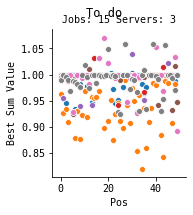

In [7]:
g: sns.FacetGrid = sns.FacetGrid(df, col='Model Name', hue='Algorithm Name')
(g.map(sns.scatterplot, 'Pos', 'Best Sum Value').set_titles("{col_name}"))

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("To do")

Save file location: ../figures/price_change/png/simple_sum_value.png
Save file location: ../figures/price_change/eps/simple_sum_value.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


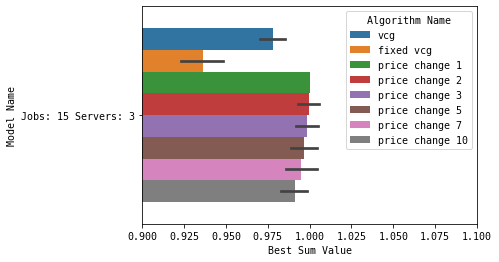

In [14]:
g = sns.barplot(y='Model Name', x='Best Sum Value', hue='Algorithm Name', ci=95, data=df)
g.set_xlim(0.9, 1.1)

save_plot(analysis_filename('simple', 'sum_value'), "price_change", image_formats=[ImageFormat.PNG, ImageFormat.EPS])
